# DONDAPATI RAKESH

# LGM VIRTUAL INTERNSHIP PROGRAM

## STOCK MARKET PREDICTION AND FORECASTING USING STACKED LSTM (LONG SHORT TERM MEMORY)
## Task -2
## Beginner level

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings(action="ignore")
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import math
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [2]:
df=pd.read_csv("/content/drive/rakesh/NSE-TATAGLOBAL.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [4]:
df.shape

(2035, 8)

In [5]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [7]:
df.describe(include="all")

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
unique,2035,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,NaN,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,NaN,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,NaN,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,NaN,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,NaN,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000


In [8]:
df.isnull()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2030,False,False,False,False,False,False,False,False
2031,False,False,False,False,False,False,False,False
2032,False,False,False,False,False,False,False,False
2033,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [10]:
df.nunique()

Date                    2035
Open                    1165
High                    1257
Low                     1263
Last                    1268
Close                   1313
Total Trade Quantity    2034
Turnover (Lacs)         2030
dtype: int64

In [11]:
df.value_counts()

Date        Open    High    Low     Last    Close   Total Trade Quantity  Turnover (Lacs)
2018-09-28  234.05  235.95  230.20  233.50  233.75  3069914               7162.35            1
2013-04-10  130.85  131.80  128.50  130.90  131.00  1396238               1817.54            1
2013-03-20  129.10  130.40  127.00  128.55  128.35  2640664               3399.29            1
2013-03-21  128.55  128.60  123.45  123.80  124.60  2807473               3541.91            1
2013-03-22  125.00  127.50  122.60  126.30  125.90  1442967               1806.03            1
                                                                                            ..
2016-01-11  143.20  144.00  140.95  141.60  141.90  1201860               1714.30            1
2016-01-12  142.40  143.45  138.05  139.90  139.50  1353097               1896.92            1
2016-01-13  141.75  141.95  130.30  135.40  135.60  1907971               2586.28            1
2016-01-14  132.10  136.25  131.15  133.90  134.05  143

In [12]:
df.corr()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total Trade Quantity,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


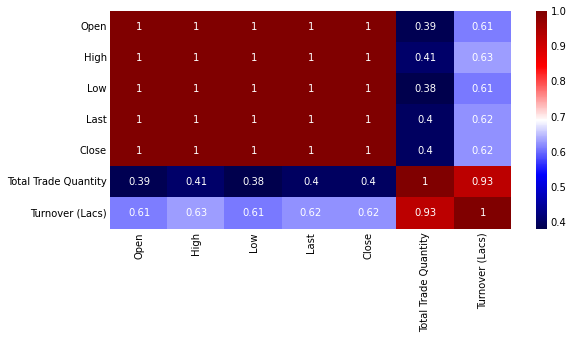

In [13]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),annot=True,cmap="seismic")
plt.show()

In [14]:
df["Close"].std()

48.71204044830029

In [15]:
np.std(df["Close"])

48.700070417293105

In [16]:
df["Close"].std()-np.std(df["Close"])

0.011970031007187742

In [17]:
np.std(df["Close"],ddof=1)

48.71204044830029

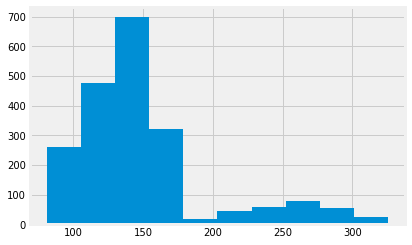

In [18]:
df["Close"].hist()

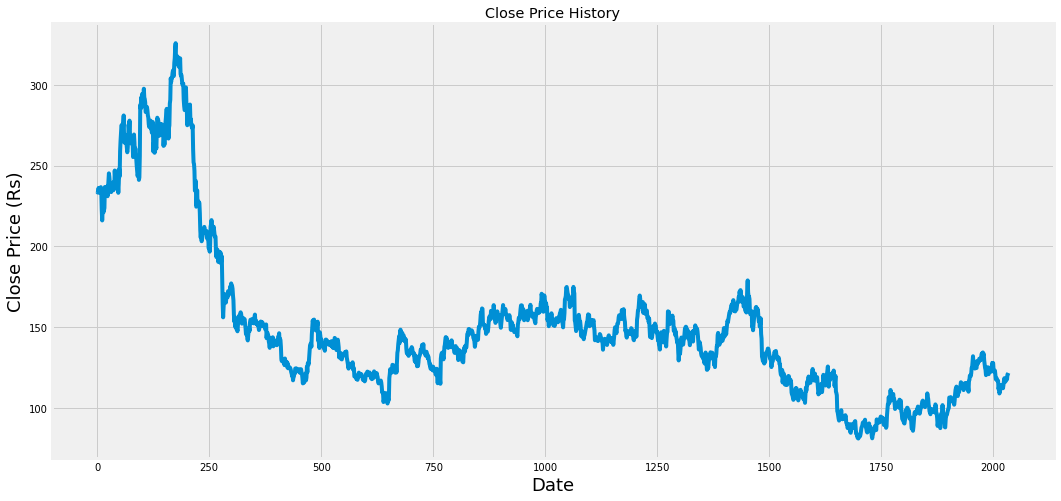

In [19]:
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.xlabel('Date',fontsize=18)
plt.ylabel("Close Price (Rs)",fontsize=18)
plt.plot(df["Close"])
plt.show()

In [20]:
#Creating a new dataframe with only the "Close Column"
data = df.filter(["Close"])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1628

In [21]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [22]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len,:]
#Split the data into x_train and y_Train data sets
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
       print(x_train)
       print(y_train)
       print()

[array([0.62418301, 0.62214052, 0.62622549, 0.63378268, 0.62234477,
       0.62765523, 0.62888072, 0.62949346, 0.63582516, 0.625     ,
       0.57883987, 0.55167484, 0.57618464, 0.58006536, 0.57230392,
       0.57781863, 0.58312908, 0.63623366, 0.62642974, 0.63337418,
       0.62745098, 0.62254902, 0.6376634 , 0.61294935, 0.63112745,
       0.65196078, 0.67075163, 0.66196895, 0.64705882, 0.63970588,
       0.62745098, 0.62336601, 0.63868464, 0.63480392, 0.63991013,
       0.64767157, 0.62785948, 0.63112745, 0.63194444, 0.67790033,
       0.65870098, 0.65890523, 0.64603758, 0.63705065, 0.67544935,
       0.66319444, 0.6439951 , 0.62152778, 0.64419935, 0.68198529,
       0.6629902 , 0.72691993, 0.75265523, 0.77144608, 0.79166667,
       0.79370915, 0.75714869, 0.77736928, 0.80208333, 0.81719771])]
[0.7495915032679739]

[array([0.62418301, 0.62214052, 0.62622549, 0.63378268, 0.62234477,
       0.62765523, 0.62888072, 0.62949346, 0.63582516, 0.625     ,
       0.57883987, 0.55167484, 0.576

In [23]:
#Convert the x_train and y_train to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

In [24]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1568, 60, 1)

In [25]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [26]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [27]:
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1568/1568 [==============================] - 46s 27ms/step - loss: 0.0021


In [28]:
#Create the testing data set
#Creating a new array containig scaled values from idex 1543 to 2003
test_data = scaled_data[training_data_len-60:,:]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [29]:
#Convert the data to a numpy array
x_test=np.array(x_test)

In [30]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1)) 

In [31]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [32]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

2.5208357602431093

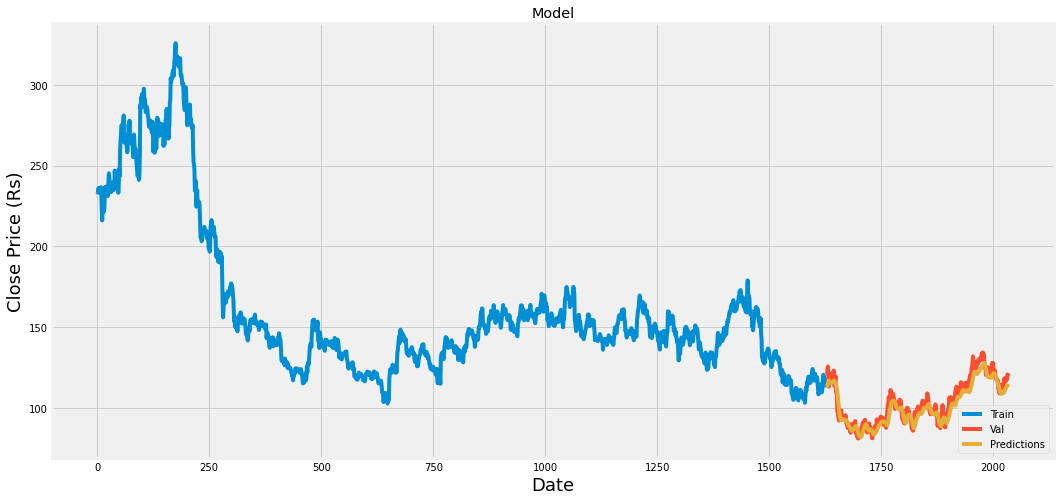

In [33]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price (Rs)",fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [34]:
#Show the valid and predicted prices
valid

,Close,Predictions
1628,120.40,112.865868
1629,120.55,113.198799
1630,123.35,113.788116
1631,125.55,114.758095
1632,120.70,116.061951
...,...,...
2030,118.65,112.934143
2031,117.60,113.400902
2032,120.65,113.703667
2033,120.90,114.224724
